In [ ]:
%pip install pingouin

Importando Bibliotecas

In [ ]:
import numpy as np, random
import pingouin as pg
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t as t_dist


### Dados para os Testes de Normalidade

Testar se seus dados seguem uma distribuição normal

Então iremos avaliar o p_valor:

- p_valor > 0.05 → dados parecem normais

- p_valor ≤ 0.05 → dados provavelmente NÃO são normais

In [ ]:
#dados = np.random.normal(0, 1, 500)

In [ ]:
dados = random.choice([
    np.random.normal(0, 1, 1000),
    np.random.exponential(1, 1000),
    np.random.uniform(-2, 2, 1000),
    np.concatenate([np.random.normal(0, 1, 950), np.random.uniform(10, 20, 50)])
])
dados

### Teste Kolmogorov-Smirnov

### Teste Kolmogorov-Smirnov Manual

In [ ]:
def kolmogorov_smirnov(data):
    # Organize os dados em ordem crescente
    data_sorted = np.sort(data)
    n = len(data_sorted)
    
    # Função de distribuição empírica F_n(x)
    F_n = np.arange(1, n+1) / n
    
    # Função de distribuição acumulada da normal F(x)
    F_x = norm.cdf(data_sorted)
    
    # Calcula o D máximo
    D = np.max(np.abs(F_n - F_x))
    p_value = kstest(data, 'norm')[1]
    
    return (D,p_value)

In [ ]:
print(f"Kolmogorov-Smirnov Manual: {kolmogorov_smirnov(dados)[0]:.4f} | p-value: {kolmogorov_smirnov(dados)[1]:.4f}")


### Teste Kolmogorov-Smirnov Biblioteca

In [ ]:
estatistica, p_valor = kstest(dados, 'norm')
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

In [ ]:
if p_valor < 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

In [ ]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Wilk

### Teste Shapiro-Wilk Manual

In [ ]:
def shapiro_wilk(dados):
    dados = np.sort(dados)
    n = len(dados)
    
    # Média e desvio padrão da amostra
    media = np.mean(dados)
    desvio = np.std(dados, ddof=1)
    
    # Estatísticas padronizadas
    z = (dados - media) / desvio

    # Coeficientes de Shapiro aproximados (usaremos simetria da normal)
    # Para isso usamos quantis da normal padrão
    m = norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])
    m = m / np.linalg.norm(m)  # Normaliza m

    # Soma ponderada dos dados ordenados com os coeficientes m
    W_numerador = (np.sum(m * dados))**2
    W_denominador = np.sum((dados - media)**2)

    W = W_numerador / W_denominador
    p_valor = shapiro(dados)[1]
    return (W, p_valor)

In [ ]:
print(f"Shapiro-Wilk Manual: {shapiro_wilk(dados)[0]:.4f} | p-value: {shapiro_wilk(dados)[1]:.4f}")

### Teste Shapiro-Wilk Biblioteca


In [ ]:
estatistica, p_valor = shapiro(dados)
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

In [ ]:
if p_valor <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

In [ ]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Francia

### Teste Shapiro-Francia Manual

In [ ]:
def shapiro_francia_test(x):
    x = np.sort(x)
    n = len(x)

    # Média dos dados
    x_mean = np.mean(x)

    # Quantis esperados da normal padrão
    m = norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])
    m_mean = np.mean(m)

    # Coeficientes 'a' (normalizados)
    u = m - m_mean
    a = u / np.sqrt(np.sum(u ** 2))

    # Numerador e denominador de W'
    numerator = (np.sum(a * x)) ** 2
    denominator = np.sum((x - x_mean) ** 2)

    W_prime = numerator / denominator
    p_value = shapiro(x)[1]
    return (W_prime, p_value)

In [ ]:
stat, p = shapiro_francia_test(dados)
print(f"Shapiro-Francia: W' = {stat:.4f}, p-valor = {p:.4f}")

In [ ]:
if p <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

In [ ]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Dados para Teste de Média Populacional

Comparar se a média de dois grupos é diferente

Então iremos avaliar o p_valor:

- p > 0.05 → as médias são provavelmente iguais

- p ≤ 0.05 → as médias são provavelmente diferentes

In [ ]:
#grupo1 = np.random.normal(0, 1, 20)
#grupo2 = np.random.normal(0, 1, 20)

In [31]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])
])

grupo2 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])
])

In [32]:
grupo1

array([0.49151079, 0.46552492, 2.89218979, 0.4581324 , 0.25088807,
       1.54153614, 0.0191029 , 1.47890722, 0.69536366, 0.09505022,
       0.2262282 , 0.29872744, 2.24430344, 0.05130282, 0.92083132,
       0.82543818, 1.58952654, 0.06760125, 1.61565126, 0.04528743])

In [33]:
grupo2

array([-1.76253111,  1.75214173,  1.34971996, -1.21377475,  1.89149907,
        0.09197807, -1.47044842, -0.80599986, -0.04987622, -1.33768162,
       -0.59595676, -0.46030401, -1.25592707, -0.89231719,  1.56231237,
        0.74510085, -0.18062394,  0.60558202,  1.72085685,  0.32948169])

### Teste Z

### Teste Z manual

In [34]:
def teste_z_duas_amostras(grupo1, grupo2, sigma1, sigma2):
    n1, n2 = len(grupo1), len(grupo2)
    media1, media2 = np.mean(grupo1), np.mean(grupo2)

    # Fórmula do Z para duas amostras com desvio conhecido
    z = (media1 - media2) / np.sqrt((sigma1**2)/n1 + (sigma2**2)/n2)

    # P-valor para teste bilateral
    p_valor = 2 * (1 - norm.cdf(abs(z)))

    return z, p_valor

In [35]:
z, p = teste_z_duas_amostras(grupo1, grupo2, sigma1=1, sigma2=1)

In [36]:
print(f"Z = {z:.4f}")
print(f"P-valor = {p:.4f}")

Z = 2.5693
P-valor = 0.0102


In [37]:
if p < 0.05:
    print("Rejeita H0: diferença estatisticamente significativa.")
else:
    print("Não rejeita H0: não há evidência forte de diferença.")

Não rejeita H0: não há evidência forte de diferença.


### Teste TStudent

### Tstudent uma amostra manual

In [ ]:
def teste_t_amostra(grupo, mu=0, alpha=0.05):
    """
    Realiza o teste t para uma amostra.

    Parâmetros:
    - grupo: array-like, dados da amostra
    - mu: valor da média populacional para o teste (default = 0)
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t da amostra
    - t_critico: valor t crítico para o nível de significância
    - rejeitar_H0: booleano indicando se H0 é rejeitada
    - mu: média populacional hipotética
    - alpha: nível de significância
    """

    # Calcular a média da amostra
    media_amostra = np.mean(grupo)

    # Calcular o desvio padrão amostral (ddof=1 -> desvio amostral)
    desvio_amostra = np.std(grupo, ddof=1)

    # Número de observações na amostra
    n = len(grupo)

    # Calcular o valor t
    t_calculado = (media_amostra - mu) / (desvio_amostra / np.sqrt(n))

    # Graus de liberdade
    df = n - 1

    # Valor crítico t (teste bilateral: alpha/2 em cada cauda)
    t_critico = t_dist.ppf(1 - alpha / 2, df)

    # Testar se devemos rejeitar H0
    rejeitar_H0 = abs(t_calculado) > t_critico

    return t_calculado, t_critico, rejeitar_H0

In [39]:
t_calculado, t_critico, rejeitar_H0 = teste_t_amostra(grupo1)
print(f"Valor t calculado: {t_calculado:.4f}")
print(f"Valor t crítico: {t_critico:.4f}")
print(f"Rejeitar H0? {'Sim' if rejeitar_H0 else 'Não'}")

Valor t calculado: 4.4395
Valor t crítico: 2.0930
Rejeitar H0? Sim


### Tstudent uma amostra biblioteca

In [40]:
mu = 0
t_stat, p_value = stats.ttest_1samp(grupo1, mu)

In [41]:
print(f"Valor t calculado: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisão sobre a hipótese nula
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: A média da amostra é significativamente diferente de", mu)
else:
    print("Não rejeitar H0: A média da amostra não é significativamente diferente de", mu)

Valor t calculado: 4.4395
Valor p: 0.0003
Rejeitar H0: A média da amostra é significativamente diferente de 0


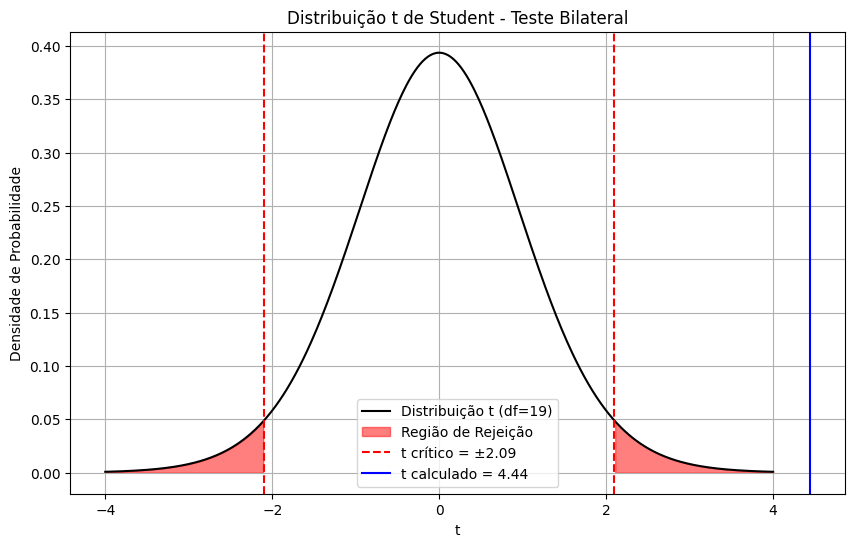

In [42]:
def plot_t_student_bilateral(t_calculado, df, alpha=0.05):
    """
    Plota a distribuição t de Student para um teste bilateral,
    destacando as regiões de rejeição e o valor t calculado.

    Parâmetros:
    - t_calculado: valor t da amostra
    - df: graus de liberdade (n - 1)
    - alpha: nível de significância (default = 0.05)
    """

    # Gerar valores t no intervalo
    t_vals = np.linspace(-4, 4, 500)
    
    # Obter densidade de probabilidade
    pdf = t_dist.pdf(t_vals, df)

    # Valores críticos para o teste bilateral
    t_critico = t_dist.ppf(1 - alpha/2, df)

    # Plotar a curva da distribuição t
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, pdf, label=f"Distribuição t (df={df})", color="black")

    # Preencher regiões de rejeição (caudas)
    plt.fill_between(t_vals, 0, pdf, where=(t_vals <= -t_critico), color='red', alpha=0.5, label="Região de Rejeição")
    plt.fill_between(t_vals, 0, pdf, where=(t_vals >= t_critico), color='red', alpha=0.5)

    # Marcar valor t crítico (positivo e negativo)
    plt.axvline(x=-t_critico, color='red', linestyle='--', label=f"t crítico = ±{t_critico:.2f}")
    plt.axvline(x=t_critico, color='red', linestyle='--')

    # Marcar valor t calculado
    plt.axvline(x=t_calculado, color='blue', linestyle='-', label=f"t calculado = {t_calculado:.2f}")

    # Configurações do gráfico
    plt.title('Distribuição t de Student - Teste Bilateral')
    plt.xlabel('t')
    plt.ylabel('Densidade de Probabilidade')
    plt.legend()
    plt.grid(True)
    plt.show()

df = len(grupo1) - 1
plot_t_student_bilateral(t_calculado, df)

### Tstudent Independente Manual

In [43]:
import math
def t_student_duas_amostras(amostra1, amostra2, alpha=0.05):
    """
    Calcula o valor t para comparação de duas amostras independentes 
    assumindo variâncias iguais (teste t para duas amostras).

    Parâmetros:
    - amostra1: lista ou array com dados da primeira amostra
    - amostra2: lista ou array com dados da segunda amostra
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t obtido
    - df: graus de liberdade
    """

    # Tamanho das amostras
    n1, n2 = len(amostra1), len(amostra2)

    # Médias das amostras
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    # Variâncias amostrais
    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # Variância combinada (assumindo variâncias iguais)
    sp = math.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))

    # Valor t calculado
    t_calculado = (media1 - media2) / (sp * math.sqrt(1/n1 + 1/n2))

    # Graus de liberdade
    df = n1 + n2 - 2

    return t_calculado, df

In [44]:
t_calculado, df = t_student_duas_amostras(grupo1, grupo2)

print(f"Valor t calculado: {t_calculado:.4f}")
print(f"Graus de liberdade: {df}")

Valor t calculado: 2.5096
Graus de liberdade: 38


### Tstudent Independente pela Biblioteca

In [45]:
stat, p = ttest_ind(grupo1, grupo2, equal_var=True)
print(f"t-Student: estatística = {stat:.4f}, p-valor = {p:.4f}")

t-Student: estatística = 2.5096, p-valor = 0.0165


In [46]:
if p <= 0.05:
    print("As médias são diferentes (rejeita H0)")
else:  
    print("As médias são significativamente iguais (não rejeita H0)")

As médias são significativamente iguais (não rejeita H0)


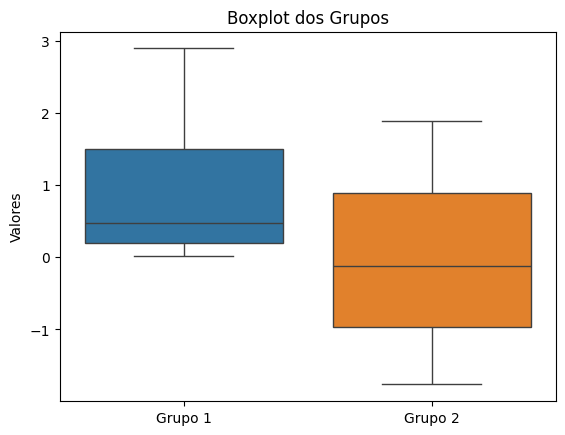

In [47]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Tstudent Emparelhado

In [48]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 10), np.random.uniform(10, 20, 10)])  
])

# Simulando uma mudança no grupo (grupo2) para amostras pareadas
grupo2 = grupo1 + np.random.normal(0, 0.5, 20)

In [ ]:
def t_student_amostras_emparelhadas(grupo1, grupo2, alpha=0.05):
    """
    Realiza o teste t de Student para amostras emparelhadas, comparando as médias das diferenças.

    Parâmetros:
    - grupo1: lista ou array com os dados da primeira amostra
    - grupo2: lista ou array com os dados da segunda amostra
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t obtido
    - p_valor: valor p para o teste
    - rejeitar_H0: booleano indicando se H0 é rejeitada
    """
    
    # Calcular as diferenças (d = grupo1 - grupo2)
    diferencas = np.array(grupo1) - np.array(grupo2)

    # Calcular a média das diferenças (d_bar)
    media_diferencas = np.mean(diferencas)

    # Calcular o desvio padrão das diferenças (s_d) - amostral
    desvio_diferencas = np.std(diferencas, ddof=1)

    # Número de pares
    n = len(diferencas)

    # Calcular o valor t
    t_calculado = media_diferencas / (desvio_diferencas / np.sqrt(n))

    # Calcular os graus de liberdade (df)
    df = n - 1

    # Calcular o p-valor (teste bilateral)
    p_valor = 2 * (1 - t_dist.cdf(abs(t_calculado), df))

    # Determinar se devemos rejeitar H0
    rejeitar_H0 = p_valor < alpha

    return t_calculado, p_valor, rejeitar_H0


In [50]:
t_calculado, p_valor, rejeitar_H0 = t_student_amostras_emparelhadas(grupo1, grupo2)
print(f"Valor t calculado: {t_calculado:.4f}")
print(f"p-valor: {p_valor:.4f}")
print(f"Rejeitar H0? {'Sim' if rejeitar_H0 else 'Não'}")

Valor t calculado: 1.2777
p-valor: 0.2167
Rejeitar H0? Não
Valor t calculado: 1.2777
p-valor: 0.2167
Rejeitar H0? Não


### Tsudent Emparelhado Pela Biblioteca

In [51]:
t_stat, p_value = stats.ttest_rel(grupo1, grupo2)
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

Estatística t: 1.2777
P-valor: 0.2167


In [52]:
if p_value < 0.05:
    print("Rejeitamos H0: As médias dos dois grupos pareados são diferentes.")
else:
    print("Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.")

Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.


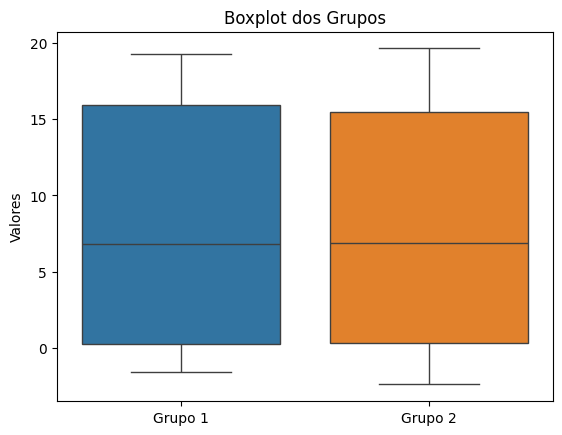

In [53]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Testes de Homogeneidade de variâncias

Então iremos avaliar o p_valor:

- p > 0.05 → as variâncias são provavelmente iguais

- p ≤ 0.05 → as variâncias são provavelmente diferentes

### Teste Bartlett

Teste Bartlett Manual

In [54]:
def bartlett_duas_amostras(amostra1, amostra2):
    """
    Realiza o teste de Bartlett para comparar as variâncias de duas amostras,
    verificando se elas vêm de populações com variâncias homogêneas.

    Parâmetros:
    - amostra1: lista ou array com os dados da primeira amostra
    - amostra2: lista ou array com os dados da segunda amostra

    Retorna:
    - estatistica: valor da estatística do teste de Bartlett
    - p_valor: valor p para o teste
    """
    
    # Número de observações em cada amostra
    n1, n2 = len(amostra1), len(amostra2)

    # Média das amostras
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    # Variância das amostras (usando fórmula amostral)
    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # Variância combinada
    sp = ((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2)

    # Estatística A (baseada nas variâncias)
    A = (n1 + n2 - 2) * math.log(sp) - (n1 - 1) * math.log(var1) - (n2 - 1) * math.log(var2)

    # Estatística B, que leva em consideração o número de observações
    B = 1 + (1 / (3 * (2 - 1))) * (1 / (n1 - 1) + 1 / (n2 - 1) - 1 / (n1 + n2 - 2))

    # Estatística do teste de Bartlett
    estatistica = A / B

    # Calcular o p-valor usando a distribuição qui-quadrado (chi2) com 1 grau de liberdade
    p_valor = 1 - stats.chi2.cdf(estatistica, df=1)

    return estatistica, p_valor


In [55]:
estatistica, p_valor = bartlett_duas_amostras(grupo1, grupo2)

# Exibir os resultados
print(f"Estatística do teste de Bartlett: {estatistica:.4f}")
print(f"P-valor: {p_valor:.4f}")

Estatística do teste de Bartlett: 0.0008
P-valor: 0.9769


### Teste Barlett pela Biblioteca

In [56]:
stat, p = bartlett(grupo1, grupo2)
print(f"Bartlett: estatística = {stat:.4f}, p-valor = {p:.4f}")

Bartlett: estatística = 0.0008, p-valor = 0.9769


In [57]:
print("Variancia grupo1:", np.var(grupo1, ddof=1))
print("Variancia grupo2:", np.var(grupo2, ddof=1))

Variancia grupo1: 69.07391184557532
Variancia grupo2: 70.01112259882588


In [58]:
if p <= 0.05:
    print("Uma ou mais variâncias são diferentes (rejeita H0)")
else:
    print("Todas as variâncias são significamente iguais (não rejeita H0)")

Todas as variâncias são significamente iguais (não rejeita H0)


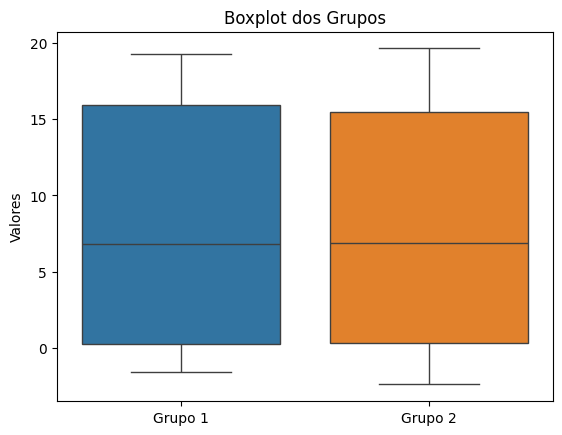

In [59]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()